In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [63]:
!unzip data.zip -d /content/data

Archive:  data.zip
replace /content/data/data/parcel/_106186597_medium.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/data/parcel/_106186597_medium.jpg  
replace /content/data/data/parcel/_106186600_medium.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/data/data/parcel/_106186600_medium.jpg  
  inflating: /content/data/data/parcel/_121077050_29bd5adb-851b-4ae1-b91b-7d5fa36f091d.jpg  
  inflating: /content/data/data/parcel/00-Featured-medium-parcels.jpg  
  inflating: /content/data/data/parcel/00-Featured-ParcelCourier-scaled-1.jpg  
  inflating: /content/data/data/parcel/00-Featured-Parcel-Package.jpg  
  inflating: /content/data/data/parcel/00-Featured-shoe-box-scaled-1.jpg  
  inflating: /content/data/data/parcel/00-ninja-van-driver-main-data.jpg  
  inflating: /content/data/data/parcel/10.jpg  
  inflating: /content/data/data/parcel/1000_F_461442769_XSf8boxLN65ztAqHKQBz2TmOZvYob8Lv.jpg  
  inflating: /content/data/data/parcel/1000_F_93042

In [64]:
import tensorflow as tf
import os
import cv2
import imghdr

In [65]:
data_dir = '/content/data/data'

In [66]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [67]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list /content/data/data/parcel/female-hands-holding-brown-ecological-260nw-2143140267.jpg
Image not in ext list /content/data/data/parcel/pile-stacked-sealed-cardboard-boxes-260nw-1457511497.jpg
Image not in ext list /content/data/data/parcel/640px-Courier_serivce_men_arranging_packages_for_the_final_stage_home_delivery_in_Taipei.jpg
Image not in ext list /content/data/data/parcel/1200px-Courier_serivce_men_arranging_packages_for_the_final_stage_home_delivery_in_Taipei.jpg
Image not in ext list /content/data/data/parcel/vector-realistic-isometric-illustration-set-260nw-1182780073.jpg
Image not in ext list /content/data/data/parcel/depositphotos_672604026-stock-photo-close-brown-post-box-paper.jpg
Image not in ext list /content/data/data/parcel/cardboard-parcel-package-box-isolated-260nw-1823148251.jpg
Image not in ext list /content/data/data/parcel/nme-au-cover-2021-parcels-hero2560x1650.jpg
Image not in ext list /content/data/data/parcel/parcel-delivery-services.jpg
I

In [68]:
import numpy as np
from matplotlib import pyplot as plt

In [86]:
data = tf.keras.utils.image_dataset_from_directory('/content/data/data')

Found 1893 files belonging to 2 classes.


In [87]:
data = data.map(lambda x,y: (x/255, y))

In [88]:
data_iterator = data.as_numpy_iterator()

In [89]:
batch = data_iterator.next()

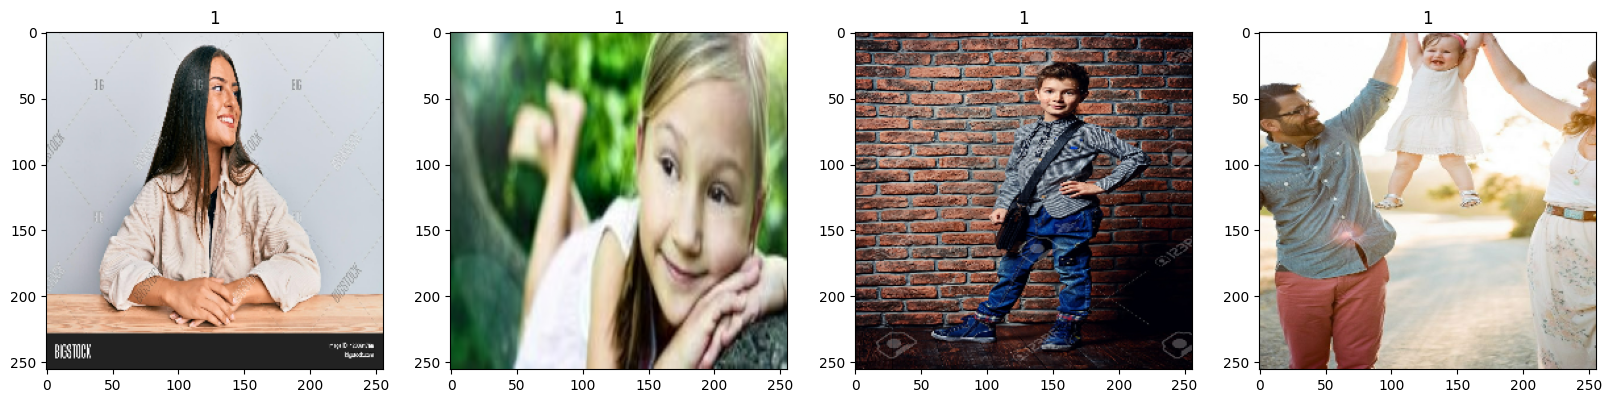

In [90]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [91]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [95]:
test_size

6

In [93]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [98]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [99]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [100]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [101]:
logdir='logs'

In [102]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [103]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
42/42 [==============================] - 42s 497ms/step - loss: 0.7660 - accuracy: 0.5513 - val_loss: 0.6781 - val_accuracy: 0.5651
Epoch 2/20
42/42 [==============================] - 24s 520ms/step - loss: 0.6398 - accuracy: 0.6243 - val_loss: 0.5137 - val_accuracy: 0.8047
Epoch 3/20
42/42 [==============================] - 23s 525ms/step - loss: 0.5202 - accuracy: 0.7597 - val_loss: 0.5134 - val_accuracy: 0.7448
Epoch 4/20
42/42 [==============================] - 22s 492ms/step - loss: 0.4521 - accuracy: 0.7984 - val_loss: 0.3929 - val_accuracy: 0.8255
Epoch 5/20
42/42 [==============================] - 23s 527ms/step - loss: 0.3759 - accuracy: 0.8423 - val_loss: 0.3742 - val_accuracy: 0.8490
Epoch 6/20
42/42 [==============================] - 33s 771ms/step - loss: 0.3240 - accuracy: 0.8601 - val_loss: 0.3960 - val_accuracy: 0.8281
Epoch 7/20
42/42 [==============================] - 24s 531ms/step - loss: 0.3017 - accuracy: 0.8765 - val_loss: 0.4455 - val_accuracy: 0.8073

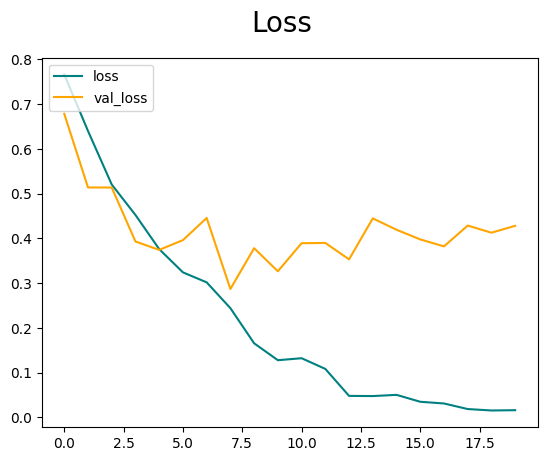

In [104]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

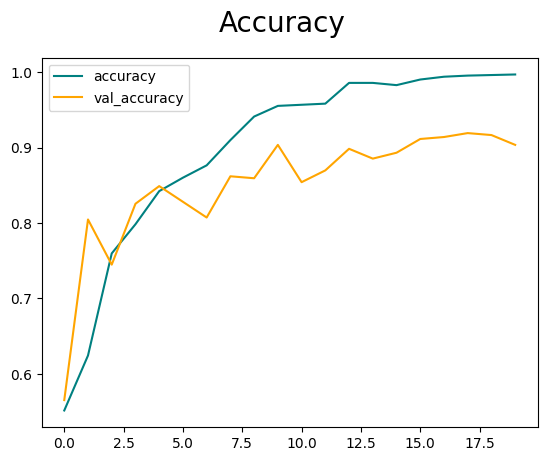

In [105]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [106]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [107]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [108]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 235ms/step


In [109]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.92, shape=(), dtype=float32) tf.Tensor(0.93877554, shape=(), dtype=float32) tf.Tensor(0.91515154, shape=(), dtype=float32)


In [112]:
import cv2

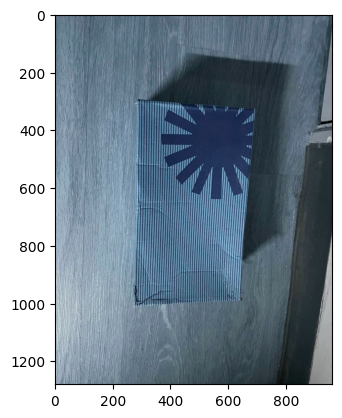

In [144]:
img = cv2.imread('/content/pp2.jpg')
plt.imshow(img)
plt.show()

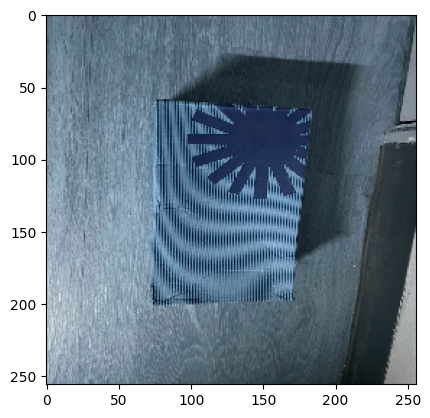

In [145]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [146]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 18ms/step


In [147]:
yhat

array([[0.01886092]], dtype=float32)

In [148]:
if yhat > 0.5:
    print(f'Person')
else:
    print(f'Parcel')

Parcel


In [149]:
from tensorflow.keras.models import load_model

In [150]:
model.save(os.path.join('models','imageclassifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [152]:
new_model = load_model('/content/models/imageclassifier.h5')

In [153]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 1s 558ms/step


array([[0.01886092]], dtype=float32)

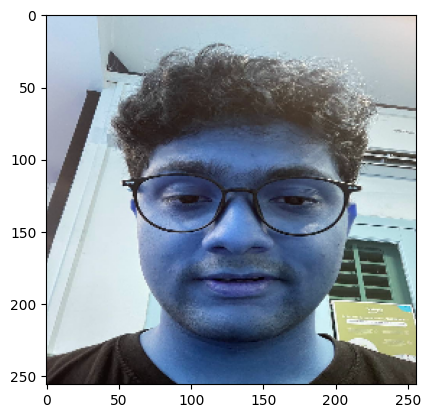

1/1 [==============================] - 0s 32ms/step
Person


In [154]:
img = cv2.imread('/content/radit22.jpg')
plt.imshow(img)
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = new_model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Person')
else:
    print(f'Parcel')